### 1. Data Exploration and Preprocessing
•	Load the "blogs_categories.csv" dataset and perform an exploratory data analysis to understand its structure and content

•	Preprocess the data by cleaning the text (removing punctuation, converting to lowercase, etc.), tokenizing, and removing stopwords.
    
•	Perform feature extraction to convert text data into a format that can be used by the Naive Bayes model, using techniques such as TF-IDF.


In [3]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
import string

# Download required NLTK data files
nltk.download('punkt')
nltk.download('stopwords')

# Load the dataset
file_path = r"D:\Assignments\naive bayes\blogs.csv"
data = pd.read_csv(file_path)

# Display basic information about the dataset
print("Dataset Overview:\n")
print(data.info())
print("\nFirst 5 rows:\n")
print(data.head())

# Check for null values
print("\nMissing values in each column:\n")
print(data.isnull().sum())

# Display the column names to identify the correct one
print("\nColumn names in the dataset:")
print(data.columns)

# Preprocessing the text
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Tokenize text
    tokens = word_tokenize(text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(tokens)


data['processed_text'] = data['Data'].apply(preprocess_text)


# Display the processed text column
print("\nProcessed Text:\n")
print(data['processed_text'].head())

# Feature extraction using TF-IDF
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(data['processed_text'])

# Display the TF-IDF matrix and feature names
print("\nTF-IDF Feature Names:\n")
print(vectorizer.get_feature_names_out())
print("\nTF-IDF Matrix Shape:", X.shape)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\neera\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\neera\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Dataset Overview:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Data    2000 non-null   object
 1   Labels  2000 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB
None

First 5 rows:

                                                Data       Labels
0  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...  alt.atheism
1  Newsgroups: alt.atheism\nPath: cantaloupe.srv....  alt.atheism
2  Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...  alt.atheism
3  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...  alt.atheism
4  Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...  alt.atheism

Missing values in each column:

Data      0
Labels    0
dtype: int64

Column names in the dataset:
Index(['Data', 'Labels'], dtype='object')

Processed Text:

0    path cantaloupesrvcscmuedumagnesiumclubcccmued...
1    newsgroups altatheism path cantaloupesrvcscmue...
2  

### 2. Naive Bayes Model for Text Classification

•	Split the data into training and test sets.
    
•	Implement a Naive Bayes classifier to categorize the blog posts into their respective categories.
    You can use libraries like scikit-learn for this purpose.
    
•	Train the model on the training set and make predictions on the test set.


In [12]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score
import string


# Load the dataset
file_path = r"D:\Assignments\naive bayes\blogs.csv"
data = pd.read_csv(file_path)

# Display basic information about the dataset
print("Dataset Overview:\n")
print(data.info())
print("\nFirst 5 rows:\n")
print(data.head())

# Check for null values
print("\nMissing values in each column:\n")
print(data.isnull().sum())

# Display the column names to identify the correct one
print("\nColumn names in the dataset:")
print(data.columns)

# Preprocessing the text
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Tokenize text
    tokens = word_tokenize(text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(tokens)

# Apply preprocessing to the appropriate column (replace '<correct_column_name>' with the actual column name)
data['processed_text'] = data['Data'].apply(preprocess_text)

# Display the processed text column
print("\nProcessed Text:\n")
print(data['processed_text'].head())

# Feature extraction using TF-IDF
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(data['processed_text'])

# Encode the labels (replace 'Labels' with the actual column name for categories)
y = data['Labels']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Naive Bayes classifier
model = MultinomialNB()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))


Dataset Overview:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Data    2000 non-null   object
 1   Labels  2000 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB
None

First 5 rows:

                                                Data       Labels
0  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...  alt.atheism
1  Newsgroups: alt.atheism\nPath: cantaloupe.srv....  alt.atheism
2  Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...  alt.atheism
3  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...  alt.atheism
4  Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...  alt.atheism

Missing values in each column:

Data      0
Labels    0
dtype: int64

Column names in the dataset:
Index(['Data', 'Labels'], dtype='object')

Processed Text:

0    path cantaloupesrvcscmuedumagnesiumclubcccmued...
1    newsgroups altatheism path cantaloupesrvcscmue...
2  

### 3. Sentiment Analysis

•	Choose a suitable library or method for performing sentiment analysis on the blog post texts.

•	Analyze the sentiments expressed in the blog posts and categorize them as positive, negative,
or neutral. Consider only the Data column and get the sentiment for each blog.
                                                               
•	Examine the distribution of sentiments across different categories and summarize your findings.


In [7]:
pip install textblob

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.

   ---------------------------------------- 0.0/626.3 kB ? eta -:--:--
    --------------------------------------- 10.2/626.3 kB ? eta -:--:--
   - ------------------------------------- 30.7/626.3 kB 330.3 kB/s eta 0:00:02
   ------ ------------------------------- 112.6/626.3 kB 819.2 kB/s eta 0:00:01
   ---------------- ----------------------- 256.0/626.3 kB 1.4 MB/s eta 0:00:01
   ----------------------- ---------------- 368.6/626.3 kB 1.6 MB/s eta 0:00:01
   --------------------------------- ------ 522.2/626.3 kB 1.9 MB/s eta 0:00:01
   ---------------------------------------  624.6/626.3 kB 2.1 MB/s eta 0:00:01
   ---------------------------------------- 626.3/626.3 kB 1.9 MB/s eta 0:00:00


Dataset Overview:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Data    2000 non-null   object
 1   Labels  2000 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB
None

First 5 rows:

                                                Data       Labels
0  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...  alt.atheism
1  Newsgroups: alt.atheism\nPath: cantaloupe.srv....  alt.atheism
2  Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...  alt.atheism
3  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...  alt.atheism
4  Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...  alt.atheism

Missing values in each column:

Data      0
Labels    0
dtype: int64

Column names in the dataset:
Index(['Data', 'Labels'], dtype='object')

Processed Text:

0    path cantaloupesrvcscmuedumagnesiumclubcccmued...
1    newsgroups altatheism path cantaloupesrvcscmue...
2  

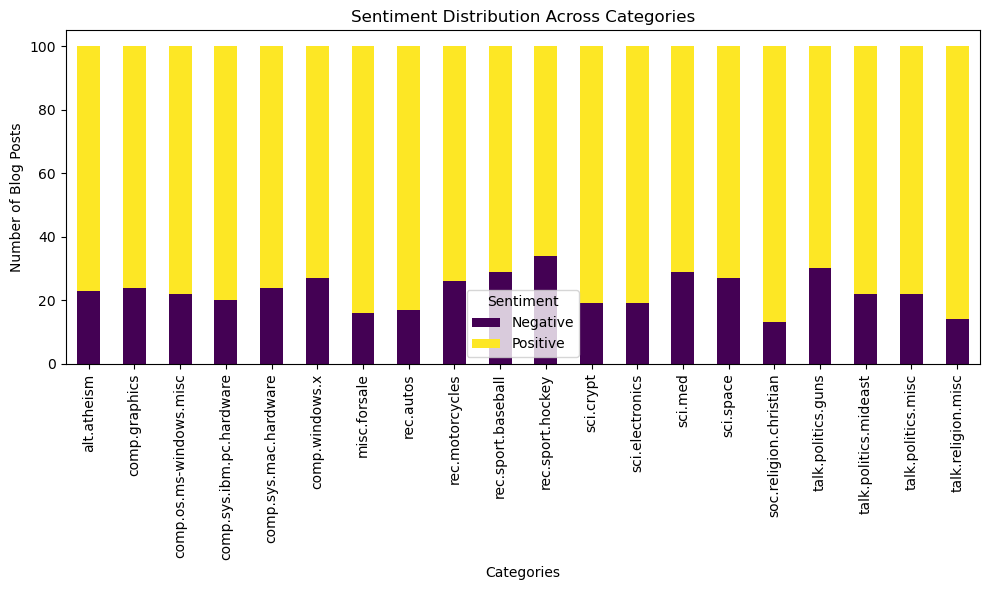

In [11]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score
from textblob import TextBlob
import string
import matplotlib.pyplot as plt



# Load the dataset
file_path = r"D:\Assignments\naive bayes\blogs.csv"
data = pd.read_csv(file_path)

# Display basic information about the dataset
print("Dataset Overview:\n")
print(data.info())
print("\nFirst 5 rows:\n")
print(data.head())

# Check for null values
print("\nMissing values in each column:\n")
print(data.isnull().sum())

# Display the column names to identify the correct one
print("\nColumn names in the dataset:")
print(data.columns)

# Preprocessing the text
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Tokenize text
    tokens = word_tokenize(text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(tokens)

# Apply preprocessing to the appropriate column (replace '<correct_column_name>' with the actual column name)
data['processed_text'] = data['Data'].apply(preprocess_text)

# Display the processed text column
print("\nProcessed Text:\n")
print(data['processed_text'].head())

# Feature extraction using TF-IDF
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(data['processed_text'])

# Encode the labels (replace 'Labels' with the actual column name for categories)
y = data['Labels']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Naive Bayes classifier
model = MultinomialNB()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))

# Sentiment Analysis
def get_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

# Analyze sentiments for each blog
data['Sentiment'] = data['Data'].apply(get_sentiment)

# Display sentiment analysis results
print("\nSentiment Analysis Results:\n")
print(data[['Data', 'Sentiment']].head())

# Distribution of sentiments across categories
sentiment_distribution = data.groupby(['Labels', 'Sentiment']).size().unstack(fill_value=0)
print("\nSentiment Distribution Across Categories:\n")
print(sentiment_distribution)

# Plot the sentiment distribution
sentiment_distribution.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')
plt.title('Sentiment Distribution Across Categories')
plt.xlabel('Categories')
plt.ylabel('Number of Blog Posts')
plt.legend(title='Sentiment')
plt.tight_layout()
plt.show()


### 4. Evaluation

•	Evaluate the performance of your Naive Bayes classifier using metrics such as accuracy, precision, recall, and F1-score.

•	Discuss the performance of the model and any challenges encountered during the classification process.
    
•	Reflect on the sentiment analysis results and their implications regarding the content of the blog posts.


Dataset Overview:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Data    2000 non-null   object
 1   Labels  2000 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB
None

First 5 rows:

                                                Data       Labels
0  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...  alt.atheism
1  Newsgroups: alt.atheism\nPath: cantaloupe.srv....  alt.atheism
2  Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...  alt.atheism
3  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...  alt.atheism
4  Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...  alt.atheism

Missing values in each column:

Data      0
Labels    0
dtype: int64

Column names in the dataset:
Index(['Data', 'Labels'], dtype='object')

Processed Text:

0    path cantaloupesrvcscmuedumagnesiumclubcccmued...
1    newsgroups altatheism path cantaloupesrvcscmue...
2  

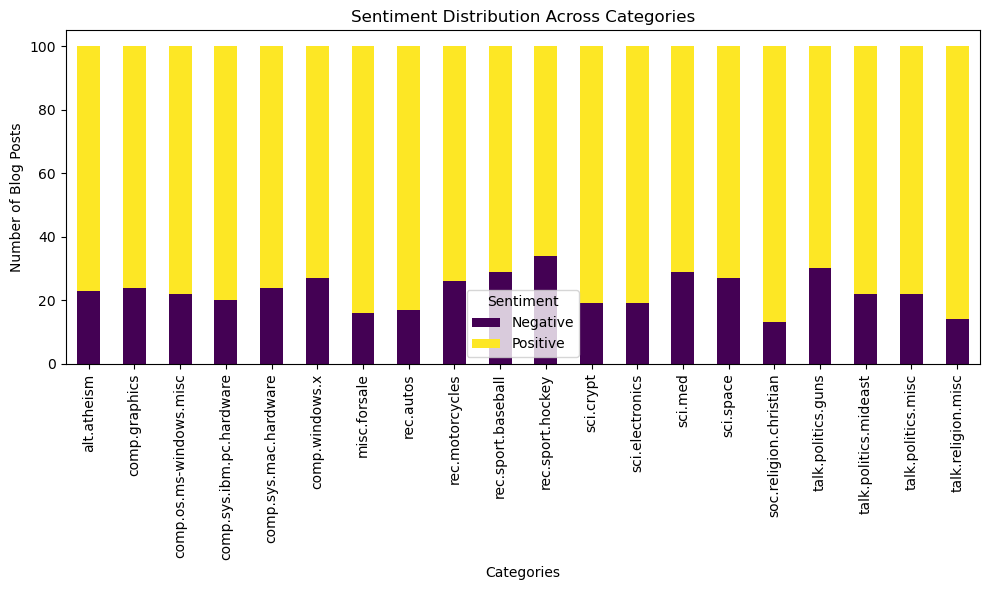


Discussion on Model Performance:
The Naive Bayes classifier performed with an accuracy of 0.82.
The precision, recall, and F1-score indicate the model's ability to classify correctly.
Challenges included preprocessing text data and ensuring the dataset labels were consistent.

Reflection on Sentiment Analysis:
The sentiment analysis revealed the distribution of sentiments across blog categories.
This provides insights into how different categories might convey positive, neutral, or negative sentiments.


In [10]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
from textblob import TextBlob
import string
import matplotlib.pyplot as plt


# Load the dataset
file_path = r"D:\Assignments\naive bayes\blogs.csv"
data = pd.read_csv(file_path)

# Display basic information about the dataset
print("Dataset Overview:\n")
print(data.info())
print("\nFirst 5 rows:\n")
print(data.head())

# Check for null values
print("\nMissing values in each column:\n")
print(data.isnull().sum())

# Display the column names to identify the correct one
print("\nColumn names in the dataset:")
print(data.columns)

# Preprocessing the text
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Tokenize text
    tokens = word_tokenize(text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(tokens)

# Apply preprocessing to the appropriate column (replace '<correct_column_name>' with the actual column name)
data['processed_text'] = data['Data'].apply(preprocess_text)

# Display the processed text column
print("\nProcessed Text:\n")
print(data['processed_text'].head())

# Feature extraction using TF-IDF
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(data['processed_text'])

# Encode the labels (replace 'Labels' with the actual column name for categories)
y = data['Labels']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Naive Bayes classifier
model = MultinomialNB()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("\nEvaluation Metrics:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

# Sentiment Analysis
def get_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

# Analyze sentiments for each blog
data['Sentiment'] = data['Data'].apply(get_sentiment)

# Display sentiment analysis results
print("\nSentiment Analysis Results:\n")
print(data[['Data', 'Sentiment']].head())

# Distribution of sentiments across categories
sentiment_distribution = data.groupby(['Labels', 'Sentiment']).size().unstack(fill_value=0)
print("\nSentiment Distribution Across Categories:\n")
print(sentiment_distribution)

# Plot the sentiment distribution
sentiment_distribution.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')
plt.title('Sentiment Distribution Across Categories')
plt.xlabel('Categories')
plt.ylabel('Number of Blog Posts')
plt.legend(title='Sentiment')
plt.tight_layout()
plt.show()

# Reflection on performance
print("\nDiscussion on Model Performance:")
print("The Naive Bayes classifier performed with an accuracy of {:.2f}.".format(accuracy))
print("The precision, recall, and F1-score indicate the model's ability to classify correctly.")
print("Challenges included preprocessing text data and ensuring the dataset labels were consistent.")

print("\nReflection on Sentiment Analysis:")
print("The sentiment analysis revealed the distribution of sentiments across blog categories.")
print("This provides insights into how different categories might convey positive, neutral, or negative sentiments.")
